In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import pandas as pd
import timeit
import time
import tensorflow as tf
from joblib import dump, load
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
data_num = "3b"

In [35]:
###################################################################
####################### All dataset ###############################
###################################################################
# Loading test dataset
df = pd.read_csv("data/d{}/test/{}.csv".format(data_num,data_num))
df.drop(["c/b", "F"], axis=1, inplace=True)
d_test = df.to_numpy()

# Poly SVM
MSE = []
for i in range(1, 5):
    reg = load('results/d{}/models/all/poly_svm_{}.joblib'.format(data_num,i))
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE.append(mse)
    
# RBF SVM
reg = load('results/d{}/models/all/rbf_svm.joblib'.format(data_num))
results = reg.predict(d_test[:,:-1])
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE.append(mse)

# NN
nn = tf.keras.models.load_model("results/d{}/models/all/nn.h5".format(data_num))
mse = nn.evaluate(d_test[:,:-1], d_test[:,-1])
MSE.append(mse)

#-----------------------------------------------------------------------#
############################ BASELINE ###################################
# Loading test dataset
df = pd.read_csv("data/d{}/test/{}.csv".format(2,2))
df.drop(["c/b", "F"], axis=1, inplace=True)
d_test = df.to_numpy()

# Poly SVM
MSE_base = []
for i in range(1, 5):
    reg = load('results/d{}/models/all/poly_svm_{}.joblib'.format(data_num,i))
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_base.append(mse)
    
# RBF SVM
reg = load('results/d{}/models/all/rbf_svm.joblib'.format(data_num))
results = reg.predict(d_test[:,:-1])
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_base.append(mse)

# NN
nn = tf.keras.models.load_model("results/d{}/models/all/nn.h5".format(data_num))
mse = nn.evaluate(d_test[:,:-1], d_test[:,-1])
MSE_base.append(mse)

1113/1113 [==============================] - 1s 632us/step - loss: 5.9959e-04


# a/c <= 1

In [36]:
###################################################################
########################## a/c <= 1 ###############################
###################################################################
#-----------------------------------------------------------------#
######################## NO BOOST #################################
# Loading test dataset
d_test = np.load("data/d{}/test/d{}_test_le.npy".format(data_num, data_num))

# Poly SVM
MSE_le = []
for i in range(1, 5):
    reg = load('results/d{}/models/le/poly_svm_{}.joblib'.format(data_num,i))
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_le.append(mse)
    
# RBF SVM
reg = load('results/d{}/models/le/rbf_svm.joblib'.format(data_num))
results = reg.predict(d_test[:,:-1])
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_le.append(mse)

# NN
nn = tf.keras.models.load_model("results/d{}/models/le/nn.h5".format(data_num))
mse = nn.evaluate(d_test[:,:-1], d_test[:,-1])
MSE_le.append(mse)

#-----------------------------------------------------------------------#
############################ BASELINE ###################################
# Loading test dataset
df = pd.read_csv("data/d{}/test/{}.csv".format(2,2))
df.drop(["c/b", "F"], axis=1, inplace=True)
d_test = df.to_numpy()

# Poly SVM
MSE_le_base = []
for i in range(1, 5):
    reg = load('results/d{}/models/le/poly_svm_{}.joblib'.format(data_num,i))
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_le_base.append(mse)
    
# RBF SVM
reg = load('results/d{}/models/le/rbf_svm.joblib'.format(data_num))
results = reg.predict(d_test[:,:-1])
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_le_base.append(mse)

# NN
nn = tf.keras.models.load_model("results/d{}/models/le/nn.h5".format(data_num))
mse = nn.evaluate(d_test[:,:-1], d_test[:,-1])
MSE_le_base.append(mse)


#-----------------------------------------------------------------#
########################### BOOST #################################
# Loading test dataset
d_test = np.load("data/d{}/test/d{}_test_le.npy".format(data_num, data_num))

# Poly SVM
MSE_le_b = []
for i in range(4):
    reg = load('results/d{}/models/le/boost/M_poly_svm_{}.joblib'.format(data_num,i))
    M = reg.predict(d_test[:,:2])
    reg = load('results/d{}/models/le/boost/g_poly_svm_{}.joblib'.format(data_num,i))
    g = reg.predict(d_test[:,1:-1])
    results = M*g
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_le_b.append(mse)
    
# RBF SVM
reg = load('results/d{}/models/le/boost/M_rbf_svm.joblib'.format(data_num))
M = reg.predict(d_test[:,:2])
reg = load('results/d{}/models/le/boost/g_rbf_svm.joblib'.format(data_num))
g = reg.predict(d_test[:,1:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_le_b.append(mse)    

# NN
nn = tf.keras.models.load_model("results/d{}/models/le/boost/M_nn.h5".format(data_num))
M = nn.predict(d_test[:,:2])
nn = tf.keras.models.load_model("results/d{}/models/le/boost/g_nn.h5".format(data_num))
g = nn.predict(d_test[:,1:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_le_b.append(mse) 

#-----------------------------------------------------------------------#
############################ BASELINE ###################################
# Loading test dataset
df = pd.read_csv("data/d{}/test/{}.csv".format(2,2))
df.drop(["c/b", "F"], axis=1, inplace=True)
d_test = df.to_numpy()

# Poly SVM
MSE_le_b_base = []
for i in range(4):
    reg = load('results/d{}/models/le/boost/M_poly_svm_{}.joblib'.format(data_num,i))
    M = reg.predict(d_test[:,:2])
    reg = load('results/d{}/models/le/boost/g_poly_svm_{}.joblib'.format(data_num,i))
    g = reg.predict(d_test[:,1:-1])
    results = M*g
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_le_b_base.append(mse)
    
# RBF SVM
reg = load('results/d{}/models/le/boost/M_rbf_svm.joblib'.format(data_num))
M = reg.predict(d_test[:,:2])
reg = load('results/d{}/models/le/boost/g_rbf_svm.joblib'.format(data_num))
g = reg.predict(d_test[:,1:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_le_b_base.append(mse)    

# NN
nn = tf.keras.models.load_model("results/d{}/models/le/boost/M_nn.h5".format(data_num))
M = nn.predict(d_test[:,:2])
nn = tf.keras.models.load_model("results/d{}/models/le/boost/g_nn.h5".format(data_num))
g = nn.predict(d_test[:,1:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_le_b_base.append(mse) 

1113/1113 [==============================] - 1s 646us/step - loss: 0.0370


# a/c > 1

In [37]:
###################################################################
########################## a/c > 1 ###############################
###################################################################
#-----------------------------------------------------------------#
######################## NO BOOST #################################
# Loading test dataset
d_test = np.load("data/d{}/test/d{}_test_g.npy".format(data_num, data_num))

# Poly SVM
MSE_g = []
for i in range(1, 5):
    reg = load('results/d{}/models/g/poly_svm_{}.joblib'.format(data_num,i))
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_g.append(mse)
    
# RBF SVM
reg = load('results/d{}/models/g/rbf_svm.joblib'.format(data_num))
results = reg.predict(d_test[:,:-1])
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_g.append(mse)

# NN
nn = tf.keras.models.load_model("results/d{}/models/g/nn.h5".format(data_num))
mse = nn.evaluate(d_test[:,:-1], d_test[:,-1])
MSE_g.append(mse)

#-----------------------------------------------------------------------#
############################ BASELINE ###################################
# Loading test dataset
df = pd.read_csv("data/d{}/test/{}.csv".format(2,2))
df.drop(["c/b", "F"], axis=1, inplace=True)
d_test = df.to_numpy()

# Poly SVM
MSE_g_base = []
for i in range(1, 5):
    reg = load('results/d{}/models/g/poly_svm_{}.joblib'.format(data_num,i))
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_g_base.append(mse)
    
# RBF SVM
reg = load('results/d{}/models/g/rbf_svm.joblib'.format(data_num))
results = reg.predict(d_test[:,:-1])
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_g_base.append(mse)

# NN
nn = tf.keras.models.load_model("results/d{}/models/g/nn.h5".format(data_num))
mse = nn.evaluate(d_test[:,:-1], d_test[:,-1])
MSE_g_base.append(mse)


#-----------------------------------------------------------------#
########################### BOOST #################################
# Loading test dataset
d_test = np.load("data/d{}/test/d{}_test_g.npy".format(data_num, data_num))

# Poly SVM
MSE_g_b = []
for i in range(4):
    reg = load('results/d{}/models/g/boost/M_poly_svm_{}.joblib'.format(data_num,i))
    M = reg.predict(d_test[:,:2])
    reg = load('results/d{}/models/g/boost/g_poly_svm_{}.joblib'.format(data_num,i))
    g = reg.predict(d_test[:,:-1])
    results = M*g
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_g_b.append(mse)
    
# RBF SVM
reg = load('results/d{}/models/g/boost/M_rbf_svm.joblib'.format(data_num))
M = reg.predict(d_test[:,:2])
reg = load('results/d{}/models/g/boost/g_rbf_svm.joblib'.format(data_num))
g = reg.predict(d_test[:,:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_g_b.append(mse)    

# NN
nn = tf.keras.models.load_model("results/d{}/models/g/boost/M_nn.h5".format(data_num))
M = nn.predict(d_test[:,:2])
nn = tf.keras.models.load_model("results/d{}/models/g/boost/g_nn.h5".format(data_num))
g = nn.predict(d_test[:,:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_g_b.append(mse) 

#-----------------------------------------------------------------------#
############################ BASELINE ###################################
# Loading test dataset
df = pd.read_csv("data/d{}/test/{}.csv".format(2,2))
df.drop(["c/b", "F"], axis=1, inplace=True)
d_test = df.to_numpy()

# Poly SVM
MSE_g_b_base = []
for i in range(4):
    reg = load('results/d{}/models/g/boost/M_poly_svm_{}.joblib'.format(data_num,i))
    M = reg.predict(d_test[:,:2])
    reg = load('results/d{}/models/g/boost/g_poly_svm_{}.joblib'.format(data_num,i))
    g = reg.predict(d_test[:,:-1])
    results = M*g
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_g_b_base.append(mse)
    
# RBF SVM
reg = load('results/d{}/models/g/boost/M_rbf_svm.joblib'.format(data_num))
M = reg.predict(d_test[:,:2])
reg = load('results/d{}/models/g/boost/g_rbf_svm.joblib'.format(data_num))
g = reg.predict(d_test[:,:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_g_b_base.append(mse)    

# NN
nn = tf.keras.models.load_model("results/d{}/models/g/boost/M_nn.h5".format(data_num))
M = nn.predict(d_test[:,:2])
nn = tf.keras.models.load_model("results/d{}/models/g/boost/g_nn.h5".format(data_num))
g = nn.predict(d_test[:,:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_g_b_base.append(mse) 

1113/1113 [==============================] - 1s 666us/step - loss: 0.0214


# Plots

## Test Dataset

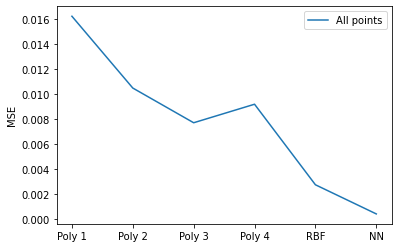

In [38]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF", "NN"]
plt.plot(algos, MSE, label="All points")
plt.ylabel("MSE")
plt.legend()

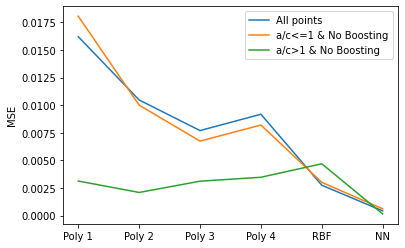

In [39]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF", "NN"]
plt.plot(algos, MSE, label="All points")
plt.plot(algos, MSE_le, label="a/c<=1 & No Boosting")
plt.plot(algos, MSE_g, label="a/c>1 & No Boosting")
plt.ylabel("MSE")
plt.legend()

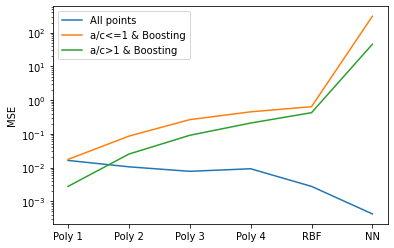

In [40]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF", "NN"]
plt.plot(algos, MSE, label="All points")
plt.plot(algos, MSE_le_b, label="a/c<=1 & Boosting")
plt.plot(algos, MSE_g_b, label="a/c>1 & Boosting")
plt.ylabel("MSE")
plt.semilogy()
plt.legend()

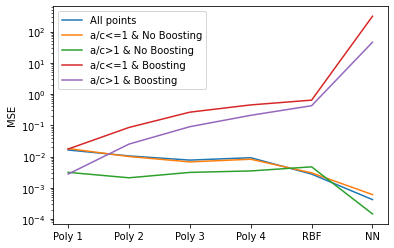

In [41]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF", "NN"]
plt.plot(algos, MSE, label="All points")
plt.plot(algos, MSE_le, label="a/c<=1 & No Boosting")
plt.plot(algos, MSE_g, label="a/c>1 & No Boosting")
plt.plot(algos, MSE_le_b, label="a/c<=1 & Boosting")
plt.plot(algos, MSE_g_b, label="a/c>1 & Boosting")
plt.ylabel("MSE")
plt.semilogy()
plt.legend()

## Baseline

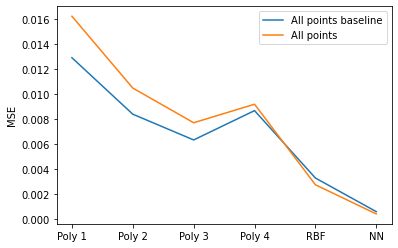

In [42]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF", "NN"]
plt.plot(algos, MSE_base, label="All points baseline")
plt.plot(algos, MSE, label="All points")
plt.ylabel("MSE")
plt.legend()

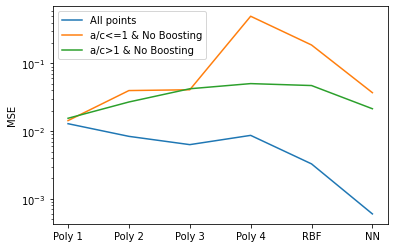

In [46]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF", "NN"]
plt.plot(algos, MSE_base, label="All points")
plt.plot(algos, MSE_le_base, label="a/c<=1 & No Boosting")
plt.plot(algos, MSE_g_base, label="a/c>1 & No Boosting")
plt.semilogy()
plt.ylabel("MSE")
plt.legend()

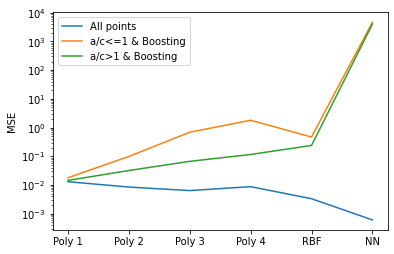

In [44]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF", "NN"]
plt.plot(algos, MSE_base, label="All points")
plt.plot(algos, MSE_le_b_base, label="a/c<=1 & Boosting")
plt.plot(algos, MSE_g_b_base, label="a/c>1 & Boosting")
plt.ylabel("MSE")
plt.semilogy()
plt.legend()

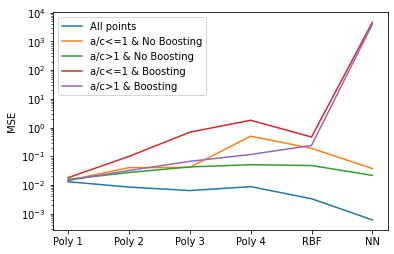

In [45]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF", "NN"]
plt.plot(algos, MSE_base, label="All points")
plt.plot(algos, MSE_le_base, label="a/c<=1 & No Boosting")
plt.plot(algos, MSE_g_base, label="a/c>1 & No Boosting")
plt.plot(algos, MSE_le_b_base, label="a/c<=1 & Boosting")
plt.plot(algos, MSE_g_b_base, label="a/c>1 & Boosting")
plt.ylabel("MSE")
plt.semilogy()
plt.legend()